In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle

plt.style.use('classic')

matplotlib.rcParams['font.family']='sans-serif'
matplotlib.rcParams['font.sans-serif']=['DejaVu Serif']
matplotlib.rcParams['mathtext.fontset'] = 'dejavuserif'

In [2]:
def load_data_dim_d(d, max_res):
    """
    Load data from all 5 methods for a given diamension.
    
    Parameters
    ----------
    d : int
        Dimension of the problem.
    max_res : int or list or np.array
        Maximum resolution of the grids.

    Returns
    -------
    data : list
        List of the data from all 5 methods.
    """
    
    if type(max_res) == int:
        hyper_data_save = []
        lhs_data_save = []
        rand_data_save = []
        RegGrid_data_save = []
        rsa_data_save = []
        gridrandom_data_save = []
        true_hyper_data_save = []
        
        for i in range(2, max_res+1):

            #methods that are not present are loaded as grid
            # If this gives an error remember to change the path and download 
            # the data from the shared folder specified in the README

            with open('values_grid_d_{}_res{}.p'.format(d,i), 'rb') as f:
                data = pickle.load(f)
            hyper_data_save.append(data)
            with open('values_grid_d_{}_res{}.p'.format(d,i), 'rb') as f:
                data = pickle.load(f)
            lhs_data_save.append(data)
            with open('values_random_d_{}_res{}.p'.format(d,i), 'rb') as f:
                data = pickle.load(f)
            rand_data_save.append(data)
            with open('values_grid_d_{}_res{}.p'.format(d,i), 'rb') as f:
                data = pickle.load(f)
            RegGrid_data_save.append(data)
            with open('values_RSA_d_{}_res{}.p'.format(d,i), 'rb') as f:
                data = pickle.load(f)
            rsa_data_save.append(data)
            with open('values_gridrandom_d_{}_res{}.p'.format(d,i), 'rb') as f:
                data = pickle.load(f)
            gridrandom_data_save.append(data)
            with open('values_tilling_d_{}_res{}.p'.format(d,i), 'rb') as f:
                data = pickle.load(f)
            true_hyper_data_save.append(data)


        return hyper_data_save, lhs_data_save, rand_data_save, RegGrid_data_save, rsa_data_save, gridrandom_data_save, true_hyper_data_save

In [3]:


def analyse_data(data,N_batch, max_res, d, mode=1):
    """
    Analyse the data from all 5 methods.

    Parameters
    ----------
    data : list
        List of the data from all 5 methods.
    N_batch : int
        Number of batches.
    number_of_girds : int
        Number of grids.
    d : int
        Dimension of the grid.

    Returns
    -------
    mean: list
        List of the mean of the minimum scaled loss from all 5 methods.
    std: list
        List of the standard deviation of the minimum scaled loss from all 5 methods.
    """
    if type(max_res) == list or type(max_res) == np.ndarray:
        max_res = len(max_res)

    mean_hyper = []
    mean_lhs = []
    mean_rand = []
    mean_RegGrid = []
    mean_rsa = []
    mean_gridrandom = []
    mean_true_hyper = []

    std_hyper = []
    std_lhs = []
    std_rand = []
    std_RegGrid = []
    std_rsa = []
    std_gridrandom = []
    std_true_hyper = []

    min_loss_hyper_save = []
    min_loss_lhs_save = []
    min_loss_rand_save = []
    min_loss_RegGrid_save = []
    min_loss_rsa_save = []
    min_loss_gridrandom_save = []
    min_loss_true_hyper_save = []

    min_all = []
    mean_resilution_rsa = []
    std_resilution_rsa = []
    mean_resilution_true_hyper = []
    std_resilution_true_hyper = []
    for i in range(max_res-1):
        min_loss_hyper = []
        min_loss_lhs = []
        min_loss_rand = []
        min_loss_RegGrid = []
        min_loss_rsa = []
        min_loss_gridrandom = []
        min_loss_true_hyper = []


        resilution_rsa = []
        resilution_true_hyper = []
        for j in range(N_batch):
            min_loss_hyper.append  (np.min(np.array(data[0][i][j])[:, d]))
            min_loss_lhs.append    (np.min(np.array(data[1][i][j])[:, d]))
            min_loss_rand.append   (np.min(np.array(data[2][i][j])[:, d]))
            min_loss_RegGrid.append(np.min(np.array(data[3][i][j])[:, d]))
            min_loss_rsa.append    (np.min(np.array(data[4][i][j])[:, d]))
            min_loss_gridrandom.append(np.min(np.array(data[5][i][j])[:, d]))
            min_loss_true_hyper.append(np.min(np.array(data[6][i][j])[:, d]))

            resilution_rsa.append  (   len(np.array(data[4][i][j])[:, d]))
            resilution_true_hyper.append  (   len(np.array(data[6][i][j])[:, d]))

        
        min_maks = [10*sth for sth in min_loss_RegGrid] 
        
        
        if mode==1:
            min_temp = np.vstack((min_loss_rand, min_loss_RegGrid, min_loss_true_hyper))
        if mode==2:
            min_temp = np.vstack((min_loss_rand, min_loss_RegGrid, min_loss_rsa, min_loss_gridrandom, min_loss_true_hyper))

        min_temp = np.min(min_temp, axis=0)
        min_all.append(min_temp)



        mean_resilution_rsa.append(np.mean(resilution_rsa))
        std_resilution_rsa.append(np.std(resilution_rsa))
        mean_resilution_true_hyper.append(np.mean(resilution_true_hyper))
        std_resilution_true_hyper.append(np.std(resilution_true_hyper))
        
        min_loss_hyper_save.append(min_loss_hyper)
        min_loss_lhs_save.append(min_loss_lhs)
        min_loss_rand_save.append(min_loss_rand)
        min_loss_RegGrid_save.append(min_loss_RegGrid)
        min_loss_rsa_save.append(min_loss_rsa)
        min_loss_gridrandom_save.append(min_loss_gridrandom)
        min_loss_true_hyper_save.append(min_loss_true_hyper)

    min_all = np.min(np.array(min_all), axis=0)

    min_loss_hyper_save = np.array(min_loss_hyper_save)/min_all
    min_loss_lhs_save = np.array(min_loss_lhs_save)/min_all
    min_loss_rand_save = np.array(min_loss_rand_save)/min_all
    min_loss_RegGrid_save = np.array(min_loss_RegGrid_save)/min_all
    min_loss_rsa_save = np.array(min_loss_rsa_save)/min_all
    min_loss_gridrandom_save = np.array(min_loss_gridrandom_save)/min_all
    min_loss_true_hyper_save = np.array(min_loss_true_hyper_save)/min_all


    for i in range(max_res-1):

        if mode==1:
            for j in range(len(min_loss_lhs_save[i])):
                l = [min_loss_RegGrid_save[i][j], min_loss_rand_save[i][j], 100*min_loss_rsa_save[i][j], 100*min_loss_gridrandom_save[i][j], min_loss_true_hyper_save[i][j]]
                wins[l.index(min(l))] +=1

        if mode==2:
            for j in range(len(min_loss_lhs_save[i])):
                l = [min_loss_RegGrid_save[i][j], min_loss_rand_save[i][j], min_loss_rsa_save[i][j], min_loss_gridrandom_save[i][j], min_loss_true_hyper_save[i][j]]
                wins[l.index(min(l))] +=1

        mean_hyper.append(np.mean(min_loss_hyper_save[i]))
        mean_lhs.append(np.mean(min_loss_lhs_save[i]))
        mean_rand.append(np.mean(min_loss_rand_save[i]))
        mean_RegGrid.append(np.mean(min_loss_RegGrid_save[i]))
        mean_rsa.append(np.mean(min_loss_rsa_save[i]))
        mean_gridrandom.append(np.mean(min_loss_gridrandom_save[i]))
        mean_true_hyper.append(np.mean(min_loss_true_hyper_save[i]))


        hyper_const = (mean_hyper[-1])/(mean_RegGrid[-1])
        lhs_const = (mean_lhs[-1])/(mean_RegGrid[-1])
        rand_const = (mean_rand[-1])/(mean_RegGrid[-1])
        RegGrid_const = (mean_RegGrid[-1])/(mean_RegGrid[-1])
        rsa_const = (mean_rsa[-1])/(mean_RegGrid[-1])
        gridrandom_const = (mean_gridrandom[-1])/(mean_RegGrid[-1])
        true_hyper_const = (mean_true_hyper[-1])/(mean_RegGrid[-1])

       


        std_hyper.append(hyper_const*np.sqrt((np.std(min_loss_hyper_save[i])/(mean_hyper[-1]))**2 + (np.std(min_loss_RegGrid_save[i])/(mean_RegGrid[-1]))**2)/np.sqrt(N_batch))
        std_lhs.append(lhs_const*np.sqrt((np.std(min_loss_lhs_save[i])/(mean_lhs[-1]))**2 + (np.std(min_loss_RegGrid_save[i])/(mean_RegGrid[-1]))**2)/np.sqrt(N_batch))
        std_rand.append(rand_const*np.sqrt((np.std(min_loss_rand_save[i])/(mean_rand[-1]))**2 + (np.std(min_loss_RegGrid_save[i])/(mean_RegGrid[-1]))**2)/np.sqrt(N_batch))
        std_RegGrid.append(0)
        std_rsa.append(rsa_const*np.sqrt((np.std(min_loss_rsa_save[i])/(mean_rsa[-1]))**2 + (np.std(min_loss_RegGrid_save[i])/(mean_RegGrid[-1]))**2)/np.sqrt(N_batch))
        std_gridrandom.append(gridrandom_const*np.sqrt((np.std(min_loss_gridrandom_save[i])/(mean_gridrandom[-1]))**2 + (np.std(min_loss_RegGrid_save[i])/(mean_RegGrid[-1]))**2)/np.sqrt(N_batch))
        std_true_hyper.append(true_hyper_const*np.sqrt((np.std(min_loss_true_hyper_save[i])/(mean_true_hyper[-1]))**2 + (np.std(min_loss_RegGrid_save[i])/(mean_RegGrid[-1]))**2)/np.sqrt(N_batch))

    mean_hyper = np.array(mean_hyper)
    mean_lhs = np.array(mean_lhs)
    mean_rand = np.array(mean_rand)
    mean_RegGrid = np.array(mean_RegGrid)
    mean_rsa = np.array(mean_rsa)
    mean_gridrandom = np.array(mean_gridrandom)
    mean_true_hyper = np.array(mean_true_hyper)


    mean_hyper = (mean_hyper)/(mean_RegGrid)
    mean_lhs = (mean_lhs)/(mean_RegGrid)
    mean_rand = (mean_rand)/(mean_RegGrid)
    mean_rsa = (mean_rsa)/(mean_RegGrid)
    mean_gridrandom = (mean_gridrandom)/(mean_RegGrid)    
    mean_true_hyper = (mean_true_hyper)/(mean_RegGrid)    
    mean_RegGrid = (mean_RegGrid)/(mean_RegGrid)
    
    
    std_hyper = np.array(std_hyper)
    std_lhs = np.array(std_lhs)
    std_rand = np.array(std_rand)
    std_RegGrid = np.array(std_RegGrid)
    std_rsa = np.array(std_rsa)
    std_gridrandom = np.array(std_gridrandom)
    std_true_hyper = np.array(std_true_hyper)


    return [mean_hyper, mean_lhs, mean_rand, mean_RegGrid, mean_rsa, mean_gridrandom, mean_true_hyper], \
    [std_hyper, std_lhs, std_rand, std_RegGrid, std_rsa, std_gridrandom, std_true_hyper], \
    [mean_resilution_rsa, std_resilution_rsa], [mean_resilution_true_hyper, std_resilution_true_hyper], \
    [min_loss_hyper_save, min_loss_lhs_save, min_loss_rand_save, min_loss_RegGrid_save, min_loss_rsa_save, min_loss_gridrandom_save, min_loss_true_hyper_save]

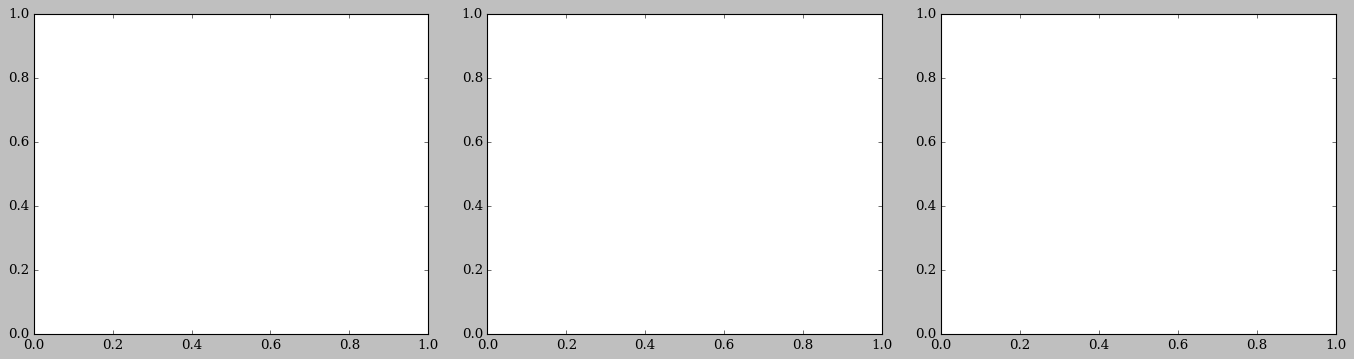

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(7*3, 5))
plt.subplots_adjust(wspace=0.15)
width_grid=0.2

In [5]:
wins_grid=0
wins_random=0
wins_hyperuniform=0

wins = [0, 0, 0, 0, 0]

data = load_data_dim_d(2, 5)
mean,std,rsa_res, true_hyper_res, d2_all = analyse_data(data,20,5,2)

FileNotFoundError: [Errno 2] No such file or directory: 'values_grid_d_2_res2.p'

In [ ]:
X =np.arange(2,6)**2

ax[0].errorbar(X, mean[3], yerr=std[3], label='Grid', marker='o', markersize=10, linestyle='-', color='green', linewidth=2, elinewidth=2, capthick=2)
ax[0].fill_between(X, mean[3]-std[3], mean[3]+std[3], alpha=0.03, color='green')
ax[0].errorbar(X, mean[2], yerr=std[2], label='Random', marker='^', markersize=10, linestyle='-', color='blue', linewidth=2, elinewidth=2, capthick=2)
ax[0].fill_between(X, mean[2]-std[2], mean[2]+std[2], alpha=0.03, color='blue')
ax[0].errorbar(true_hyper_res[0], mean[6], yerr=std[6], xerr=true_hyper_res[1], label='Hyperuniform', marker='s',  markersize=10, linestyle='-', color='red', linewidth=2, elinewidth=2, capthick=2)
ax[0].fill_between(true_hyper_res[0], mean[6]-std[6], mean[6]+std[6], alpha=0.03, color='red')

ax[0].set_ylabel('Scaled loss relative to \n grid search', fontsize = 20)

maks_power = int(np.log10(20**2))

values_upper = []
ticks_upper = []

ax[0].set_xscale('log')
ax[0].set(ylim=(0.25, 1.08), xlim=(3, 30))

for i in range(1, maks_power+1):
  if 10**i >= 3 and 10**i <= 30:
    values_upper.append(10**i)
    ticks_upper.append('$10^{}$'.format(i))
      
ax0 = ax[0].twiny()
ax0.set_xlim(3, 30)
ax0.set_xscale('log')
ax0.set_xticks(values_upper, ticks_upper, fontsize=20)
ax[0].set_xticks([i**2 for i in range(2, 6)], [r'${}^{}$'.format(i, 2) for i in range(2, 6)], fontsize=20)
ax[0].tick_params(labelsize=20)

ax0.set_axisbelow(True)
ax[0].set_axisbelow(True)
ax[0].set_facecolor('whitesmoke')

plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [ ]:
print("Data used in the manuscript. It refers to the comparison of only grid, random, and hyperuniform strategies.")
print("")
print("2d-how-much-better")
print("Hyperuniform-than-random", sum([(mean[2][i]-mean[6][i])/mean[2][i] for i in range(len(mean[6]))])*100/len(mean[6]))
print("Hyperuniform-than-grid", sum([(mean[3][i]-mean[6][i])/mean[3][i] for i in range(len(mean[6]))])*100/len(mean[6]))

wins_grid += wins[0]
wins_random += wins[1]
wins_hyperuniform += wins[4]

Data used in the manuscript. It refers to the comparison of only grid, random, and hyperuniform strategies.

2d-how-much-better
Hyperuniform-than-random -11.459971029972387
Hyperuniform-than-grid 15.838965786048991


In [ ]:
wins = [0, 0, 0, 0, 0]
#index 0 is grid, index 1 random, index 2 RSA

data = load_data_dim_d(2, 5)
mean,std,rsa_res, true_hyper_res, d2_all = analyse_data(data,20,5,2,mode=2)

In [ ]:
#Now the data used in the manuscript is displayed
print("Data used in Table III. It refers to the comparison of all considered strategies")

print("")
print("Data for 2d - fraction of wins")
print("Grid", wins[0]/sum(wins))
print("Random", wins[1]/sum(wins))
print("RSA", wins[2]/sum(wins))
print("Gridrandom", wins[3]/sum(wins))
print("Hyperuniform", wins[4]/sum(wins))

print("")
print("Data for 2d - mean loss")
print("Grid", sum(mean[3])/len(mean[3]))
print("Random", sum(mean[2])/len(mean[2]))
print("RSA", sum(mean[4])/len(mean[4]))
print("Gridrandom", sum(mean[5])/len(mean[5]))
print("Hyperuniform", sum(mean[6])/len(mean[6]))

Data used in Table III. It refers to the comparison of all considered strategies

Data for 2d - fraction of wins
Grid 0.1125
Random 0.2375
RSA 0.2625
Gridrandom 0.225
Hyperuniform 0.1625

Data for 2d - mean loss
Grid 1.0
Random 0.7911475672375696
RSA 0.8077281627557203
Gridrandom 0.8095210443801109
Hyperuniform 0.8430870691717393


In [ ]:
wins = [0, 0, 0, 0, 0]

data = load_data_dim_d(3, 5)
mean,std,rsa_res,true_hyper_res,d3_all = analyse_data(data,20,5,3)

In [ ]:
X =np.arange(2,6)**3

ax[1].errorbar(X, mean[3], yerr=std[3], label='Grid', marker='o', markersize=10, linestyle='-', color='green', linewidth=2, elinewidth=2, capthick=2)
ax[1].fill_between(X, mean[3]-std[3], mean[3]+std[3], alpha=0.03, color='green')
ax[1].errorbar(X, mean[2], yerr=std[2], label='Random', marker='^', markersize=10, linestyle='-', color='blue', linewidth=2, elinewidth=2, capthick=2)
ax[1].fill_between(X, mean[2]-std[2], mean[2]+std[2], alpha=0.03, color='blue')
ax[1].errorbar(true_hyper_res[0], mean[6], yerr=std[6], xerr=true_hyper_res[1], label='Hyperuniform', marker='s',  markersize=10, linestyle='-', color='red', linewidth=2, elinewidth=2, capthick=2)
ax[1].fill_between(true_hyper_res[0], mean[6]-std[6], mean[6]+std[6], alpha=0.03, color='red')
ax[1].tick_params(labelsize=20)


handles, labels = ax[1].get_legend_handles_labels()
handles = [x[0] for x in handles]

l = ax[1].legend(handles, labels, fontsize=20, markerscale=1.3, loc = (1.5, 0.02))

for line in l.get_lines():
   line.set_linewidth(2)

maks_power = int(np.log10(5**3))

values_upper = []
ticks_upper = []

ax[1].set_xscale('log')
ax[1].set(ylim=(0.35, 1.05), xlim=(6, 150))

for i in range(1, maks_power+1):
  if 10**i >= 6 and 10**i <= 150:
    values_upper.append(10**i)
    ticks_upper.append('$10^{}$'.format(i))


ax1 = ax[1].twiny()
ax1.set_xlim(6, 150)
ax1.set_xscale('log')
ax1.set_xticks(values_upper, ticks_upper, fontsize=20)
ax[1].set_xticks([i**3 for i in range(2, 6)], [r'${}^{}$'.format(i, 3) for i in range(2, 6)], fontsize=20)

ax1.set_axisbelow(True)
ax[1].set_axisbelow(True)
ax[1].set_facecolor('whitesmoke')

ax[1].set_zorder(1)
ax1.set_zorder(1)

plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [ ]:
print("Data used in the manuscript. It refers to the comparison of only grid, random, and hyperuniform.")
print("")
print("3d-how-much-better")
print("Hyperuniform-than-random", sum([(mean[2][i]-mean[6][i])/mean[2][i] for i in range(len(mean[6]))])*100/len(mean[6]))
print("Hyperuniform-than-grid", sum([(mean[3][i]-mean[6][i])/mean[3][i] for i in range(len(mean[6]))])*100/len(mean[6]))

wins_grid += wins[0]
wins_random += wins[1]
wins_hyperuniform += wins[4]

Data used in the manuscript. It refers to the comparison of only grid, random, and hyperuniform.

3d-how-much-better
Hyperuniform-than-random 1.3924446187189552
Hyperuniform-than-grid 22.39162873984566


In [ ]:
wins = [0, 0, 0, 0, 0]

data = load_data_dim_d(3, 5)
mean,std,rsa_res,true_hyper_res,d3_all = analyse_data(data,20,5,3,mode=2)

In [ ]:
#Now the data used in the manuscript is displayed

print("Data used in Table III. It refers to the comparison of all considered strategies")

print("")
print("Data for 3d - fraction of wins")
print("Grid", wins[0]/sum(wins))
print("Random", wins[1]/sum(wins))
print("RSA", wins[2]/sum(wins))
print("Gridrandom", wins[3]/sum(wins))
print("Hyperuniform", wins[4]/sum(wins))

print("")
print("Data for 3d - mean loss")
print("Grid", sum(mean[3])/len(mean[3]))
print("Random", sum(mean[2])/len(mean[2]))
print("RSA", sum(mean[4])/len(mean[4]))
print("Gridrandom", sum(mean[5])/len(mean[5]))
print("Hyperuniform", sum(mean[6])/len(mean[6]))

Data used in Table III. It refers to the comparison of all considered strategies

Data for 3d - fraction of wins
Grid 0.075
Random 0.2
RSA 0.2
Gridrandom 0.3125
Hyperuniform 0.2125

Data for 3d - mean loss
Grid 1.0
Random 0.7921920575341157
RSA 0.7968058311268269
Gridrandom 0.7664446816260633
Hyperuniform 0.775963350179091


In [ ]:
wins = [0, 0, 0, 0, 0] 

data = load_data_dim_d(4, 5)
mean,std,rsa_res,true_hyper_res,d4_all = analyse_data(data,20,5,4)

In [ ]:
X = np.array([2**4, 3**4, 4**4, 5**4])

ax[2].errorbar(X, mean[3], yerr=std[3], label='Grid', marker='o', markersize=10, linestyle='-', color='green', linewidth=2, elinewidth=2, capthick=2)
ax[2].fill_between(X, mean[3]-std[3], mean[3]+std[3], alpha=0.03, color='green')
ax[2].errorbar(X, mean[2], yerr=std[2], label='Random', marker='^', markersize=10, linestyle='-', color='blue', linewidth=2, elinewidth=2, capthick=2)
ax[2].fill_between(X, mean[2]-std[2], mean[2]+std[2], alpha=0.03, color='blue')
ax[2].errorbar(true_hyper_res[0], mean[6], yerr=std[6], xerr=true_hyper_res[1], label='Hyperuniform', marker='s',  markersize=10, linestyle='-', color='red', linewidth=2, elinewidth=2, capthick=2)
ax[2].fill_between(true_hyper_res[0], mean[6]-std[6], mean[6]+std[6], alpha=0.03, color='red')


maks_power = int(np.log10(5**4))

values_upper = []
ticks_upper = []

ax[2].set_xscale('log')
ax[2].set(ylim=(0.4, 1.075), xlim=(12, 700))

for i in range(1, maks_power+1):
  if 10**i >= 14 and 10**i <= 700:
    values_upper.append(10**i)
    ticks_upper.append('$10^{}$'.format(i))

ax2 = ax[2].twiny()
ax2.set_xlim(12, 700)
ax2.set_xscale('log')
ax2.set_xticks(values_upper, ticks_upper, fontsize=20)
ax[2].set_xticks([i**4 for i in range(2, 6)], [r'${}^{}$'.format(i, 4) for i in range(2, 6)], fontsize=20)
ax[2].tick_params(labelsize=20)

ax2.set_axisbelow(True)
ax[2].set_axisbelow(True)
ax[2].set_facecolor('whitesmoke')

In [ ]:
print("Data used in the manuscript. It refers to the comparison of only grid, random, and hyperuniform.")
print("")
print("4d-how-much-better")
print("Hyperuniform-than-random", sum([(mean[2][i]-mean[6][i])/mean[2][i] for i in range(len(mean[6]))])*100/len(mean[6]))
print("Hyperuniform-than-grid", sum([(mean[3][i]-mean[6][i])/mean[3][i] for i in range(len(mean[6]))])*100/len(mean[6]))

wins_grid += wins[0]
wins_random += wins[1]
wins_hyperuniform += wins[4]

Data used in the manuscript. It refers to the comparison of only grid, random, and hyperuniform.

4d-how-much-better
Hyperuniform-than-random 0.24932135370222436
Hyperuniform-than-grid 16.55556635369945


In [ ]:
wins = [0, 0, 0, 0, 0] 

data = load_data_dim_d(4, 5)
mean,std,rsa_res,true_hyper_res,d4_all = analyse_data(data,20,5,4,mode=2)

In [ ]:
#Now the data used in the manuscript is displayed
print("Data used in Table III. It refers to the comparison of all considered strategies")

print("")
print("Data for 4d - fraction of wins")
print("Grid", wins[0]/sum(wins))
print("Random", wins[1]/sum(wins))
print("RSA", wins[2]/sum(wins))
print("Gridrandom", wins[3]/sum(wins))
print("Hyperuniform", wins[4]/sum(wins))

print("")
print("Data for 4d - mean loss")
print("Grid", sum(mean[3])/len(mean[3]))
print("Random", sum(mean[2])/len(mean[2]))
print("RSA", sum(mean[4])/len(mean[4]))
print("Gridrandom", sum(mean[5])/len(mean[5]))
print("Hyperuniform", sum(mean[6])/len(mean[6]))

Data used in Table III. It refers to the comparison of all considered strategies

Data for 4d - fraction of wins
Grid 0.1625
Random 0.1875
RSA 0.15
Gridrandom 0.225
Hyperuniform 0.275

Data for 4d - mean loss
Grid 1.0
Random 0.8436173820941356
RSA 0.8722199066857377
Gridrandom 0.847760524655366
Hyperuniform 0.8341940139283623


In [ ]:
print("Data used in the manuscript. It refers to the comparison of only grid, random, and hyperuniform strategies.")
print("")
print("Total number of wins")
print("Grid", wins_grid)
print("Random", wins_random)
print("Hyperuniform", wins_hyperuniform)

Data used in the manuscript. It refers to the comparison of only grid, random, and hyperuniform strategies.

Total number of wins
Grid 42
Random 95
Hyperuniform 103


In [ ]:
ax[0].set_title("2D", x=0.1, y=0.8, fontsize=20)
ax[1].set_title("3D", x=0.1, y=0.8, fontsize=20)
ax[2].set_title("4D", x=0.1, y=0.8, fontsize=20)

fig.suptitle("Comparison for CNN in 2-4 dimensions", fontsize=25, y=1.05)
fig.text(0.5, -0.02, "Number of sampled points", ha ='center', fontsize=20)

Text(0.5, -0.02, 'Number of sampled points')

In [ ]:
plt.tight_layout()
fig.savefig('CNN.png', dpi=600, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>